<a href="https://colab.research.google.com/github/21JN1A4503/CODSOFT/blob/main/TASK_3_SALES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sales prediction  by using machine learning in Python.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)


#Loading the  sales dataset

In [5]:
df = pd.read_csv('/content/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#checking for outier with  visualization

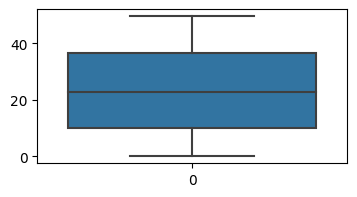

In [11]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Radio'])
plt.show()

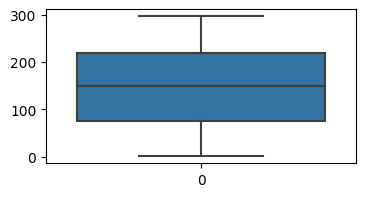

In [12]:
plt.figure(figsize = (4,2))
sns.boxplot(df['TV'])
plt.show()

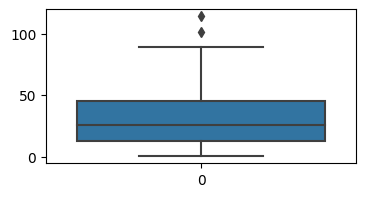

In [13]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Newspaper'])
plt.show()

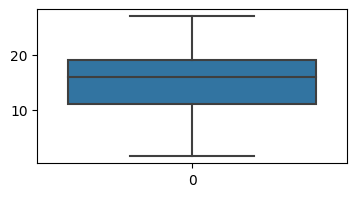

In [14]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Sales'])
plt.show()

##In above graph , there is no outlier expect "newspaper"

In [15]:
IQR = df.Newspaper.quantile(0.75)  - df.Newspaper.quantile(0.25)
min_value = df['Newspaper'].quantile(0.25) - (IQR*1.5)
max_value =df['Newspaper'].quantile(0.75) - (IQR*1.5)
print(min_value , "\n", max_value)

-35.775000000000006 
 -3.4250000000000043


In [16]:
df = df.copy()

In [17]:
df.loc[df['Newspaper']>93 , 'Newspaper'] = 93

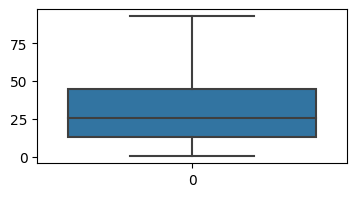

In [18]:
plt.figure(figsize=(4,2))
sns.boxplot(df['Newspaper'])
plt.show()

#Now  There is no outlier in dataset

<Axes: >

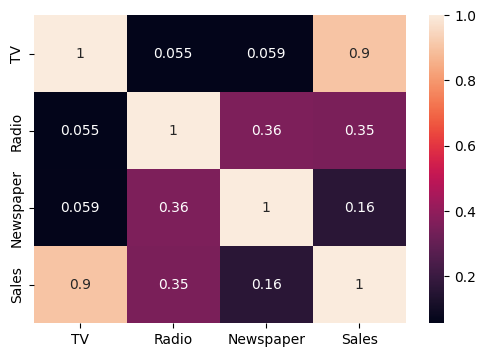

In [19]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), annot =True)

###All data set is numeric form now , we can train the model now

#Target Variable and feature

In [20]:
# Create matrix of features
x = df.drop('Sales', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = df['Sales'] # y is the column we're trying to predict


In [21]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

###Model Training

In [22]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .33)

In [23]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [24]:
x_train.shape

(134, 3)

In [25]:
x_test.shape

(66, 3)

In [26]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [27]:
y_train.shape

(134,)

In [28]:

# Import model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create instance of model
lin_reg = LinearRegression()

# Pass training data into model
lin_reg.fit(x_train, y_train)
# pipe = make_pipeline(StandardScaler(), LinearRegression())
# pipe.fit(x_train, y_train)

LinearRegression()

#model predictions

In [29]:
# Predict
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(66,)
[12.50933179 12.4656356   8.26316518 11.48787345 17.14307955 17.00799075
 17.57889072 21.58566903 20.9062796   9.48482416 18.29204877 19.19858793
 18.14952106 20.84558448 10.99125206 17.90402871 15.87592152 12.07722867
 10.99728852 16.712944   11.04547226  8.42231101  7.13387506 20.06588505
 19.59472976 14.7323752  15.52483216 21.27948843 24.92764624  9.90047998
 13.5464369  20.81449322 11.90338539  9.86971422 18.04248652 16.83317042
 10.37400221 10.47036812  8.96950023 14.17996623 11.48012045 21.48641344
 18.88965613 20.18770711 17.10748905  9.28756512  9.64792339 21.865551
 20.666347   13.4447385  17.39856439 16.5833054  15.72969345 13.29425122
 12.22322292  9.21367545 19.2881073  20.4890102   8.27553282 10.74299345
 24.82649422 13.83926501 15.14464005 18.98470174  5.51071963  9.52122048]


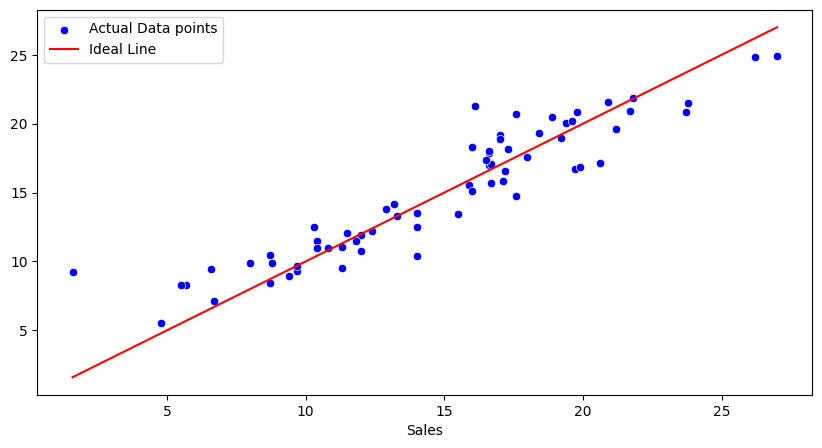

In [30]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [31]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))


# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
         14.00 |         12.51
         10.30 |         12.47
          5.70 |          8.26
         10.40 |         11.49
         20.60 |         17.14
         16.60 |         17.01
         18.00 |         17.58
         20.90 |         21.59
         21.70 |         20.91
          6.60 |          9.48
         16.00 |         18.29
         17.00 |         19.20
         17.30 |         18.15
         19.80 |         20.85
         10.80 |         10.99
         16.60 |         17.90
         17.10 |         15.88
         11.50 |         12.08
         10.40 |         11.00
         19.70 |         16.71
         11.30 |         11.05
          8.70 |          8.42
          6.70 |          7.13
         19.40 |         20.07
         21.20 |         19.59
         17.60 |         14.73
         15.90 |         15.52
         16.10 |         21.28
         27.00 |         24.93
          8.00 |          9.90
     

## **Residual Analysis**
Residual analysis in linear regression is a way to check how well the model fits the data. It involves looking at the differences (residuals) between the actual data points and the predictions from the model.


In [32]:
residual = actual- y_pred.reshape(-1)
print(residual)

[ -1.20933179  -1.1656356    3.03683482  -0.18787345  -5.84307955
  -5.70799075  -6.27889072 -10.28566903  -9.6062796    1.81517584
  -6.99204877  -7.89858793  -6.84952106  -9.54558448   0.30874794
  -6.60402871  -4.57592152  -0.77722867   0.30271148  -5.412944
   0.25452774   2.87768899   4.16612494  -8.76588505  -8.29472976
  -3.4323752   -4.22483216  -9.97948843 -13.62764624   1.39952002
  -2.2464369   -9.51449322  -0.60338539   1.43028578  -6.74248652
  -5.53317042   0.92599779   0.82963188   2.33049977  -2.87996623
  -0.18012045 -10.18641344  -7.58965613  -8.88770711  -5.80748905
   2.01243488   1.65207661 -10.565551    -9.366347    -2.1447385
  -6.09856439  -5.2833054   -4.42969345  -1.99425122  -0.92322292
   2.08632455  -7.9881073   -9.1890102    3.02446718   0.55700655
 -13.52649422  -2.53926501  -3.84464005  -7.68470174   5.78928037
   1.77877952]


<Axes: ylabel='Density'>

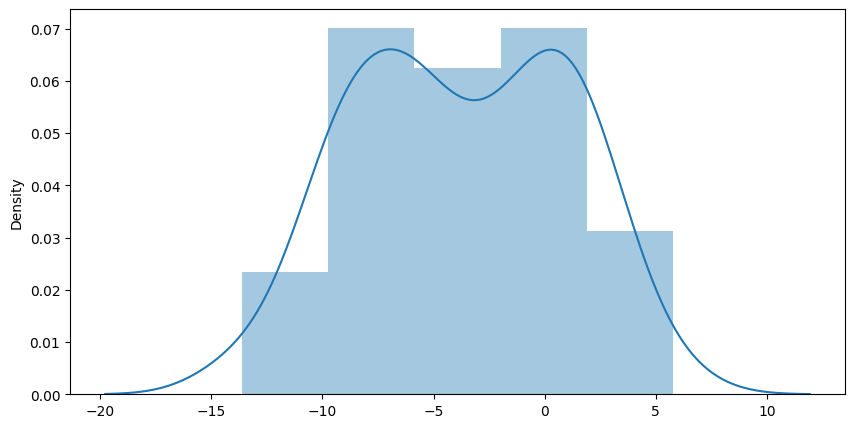

In [33]:
# Distribution plot for Residual (difference between actual and predicted values)
sns.distplot(residual, kde=True)

#Mean Squared error

In [34]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)

#measure r2_score
r2 =r2_score(y_test, y_pred)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("R2_score:" , r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
R2_score: 0.865884576652898
Mean Squared Error: 3.7797288547716845
Root Mean Squared Error: 1.9441524772434091


#Decision Tree

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

r2_dt =r2_score(y_test, y_pred)
DTr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print("r2_score: ", r2_dt)
print('Decision Tree Regression: ',DTr)

r2_score:  0.865884576652898
Decision Tree Regression:  2.389696969696969


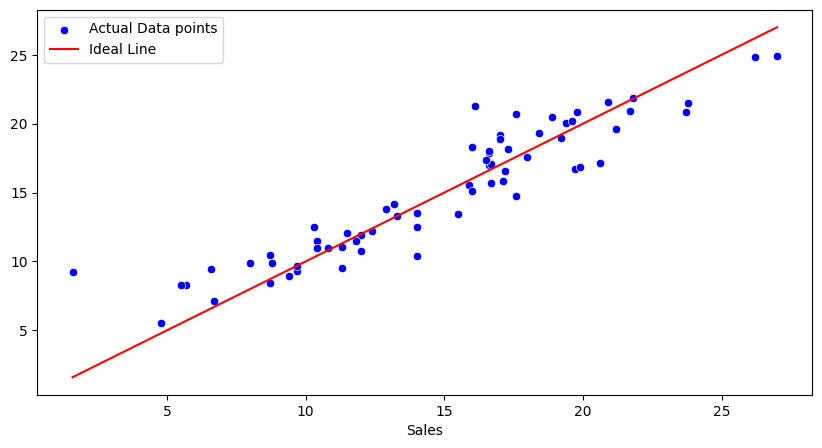

In [36]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()